In [38]:
import numpy as np
import os 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy
import scipy.io as sio
from scipy import stats
import seaborn as sns
dirpath = os.getcwd()
#from statannot import add_stat_annotation


In [39]:
import sys
sys.executable
#import nibabel as ni

'/Library/Developer/CommandLineTools/usr/bin/python3'

In [40]:
dirpath = os.getcwd()
#print(dirpath)
#file = os.path.join(dirpath, 'Overview.xlsx') #)
file = 'Overview.xlsx'
xl = pd.ExcelFile(file)
df = xl.sheet_names

In [41]:
df = xl.parse(9)
data = df.iloc[:,:4]
data

/Users/pkf/Library/Python/3.9/lib/python/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Behavioral Accuracy (Expected-Uninformative),Classification Accuracy (Expected-Uninformative),Region
0,0.000100,0.082000,Contra-lateral
1,0.043887,0.045200,Contra-lateral
2,0.096117,0.072340,Contra-lateral
3,0.075839,0.054300,Contra-lateral
4,0.085233,0.093200,Contra-lateral
5,0.023823,0.032100,Contra-lateral
6,0.068790,0.078000,Contra-lateral
7,0.070648,0.060210,Contra-lateral
8,0.054311,0.073400,Contra-lateral
9,0.085600,0.103000,Contra-lateral


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


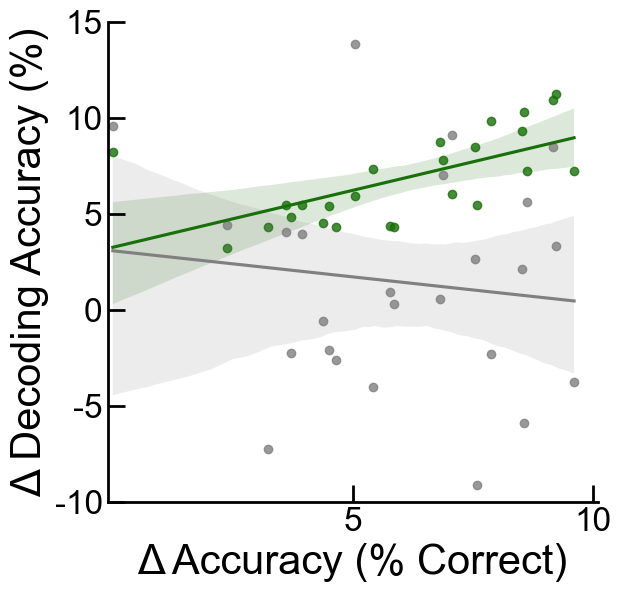

In [42]:
reg_dct = ['Contra-lateral', 'Ipsi-lateral']
fig, ax = plt.subplots()

#adjustable colors
colors = ["#6eb574","grey"]
colors = ["black","grey"]
colors = ["#19700a","grey"]


da0 = data[data['Region']==reg_dct[0]]
da1 = data[data['Region']==reg_dct[1]]
x = "Behavioral Accuracy (Expected-Uninformative)"
y = "Classification Accuracy (Expected-Uninformative)"
axis = sns.regplot(x=x,y=y, data=da0,
                    scatter_kws={"color": colors[0]}, 
                    line_kws={"color": colors[0]}, 
                    label='small', ax=ax)
sns.regplot(x=x,y=y, data=da1,
                    scatter_kws={"color": colors[1]}, 
                    line_kws={"color": colors[1]}, 
                    label='small', ax=ax)
# axis.axes.set_title(reg_dct[idx].replace('-','') + ' S1',fontsize=30, y = 1.05)
axis.set_ylabel('Δ Decoding Accuracy (%)',fontsize=30,fontname='Arial')
axis.set_xlabel('Δ Accuracy (% Correct)',fontsize=30,fontname='Arial')
#axis.set_xlabel('')
axis.tick_params(labelsize=10)
axis.spines['right'].set_visible(False)
axis.spines['top'].set_visible(False)
#axis.spines['bottom'].set_visible(False)
axis.spines['left'].set_linewidth(2)
axis.spines['bottom'].set_linewidth(2)
axis.set_ylim([-0.1,0.15])
axis.set_yticks([-0.1,-0.05,0,0.05,0.1,0.15], fontname='Arial')
axis.set_yticklabels(['-10','-5','0','5','10','15'],fontname='Arial')
axis.set_xlim([-0.001,0.101])
axis.set_xticks([0.05,0.1], fontname='Arial')
axis.set_xticklabels(['5','10'],fontname='Arial')
axis.tick_params(axis='both', which='major', direction='in',length=12, labelsize=24, width=2)

    
plt.subplots_adjust(left=1.5,
                bottom=0.1, 
                right=2.2, 
                top=0.9, 
                wspace=0.4, 
                hspace=0.4)

handles, labels = plt.gca().get_legend_handles_labels()
#plt.legend(handles,reg_dct, fontsize = 18, frameon=False, loc='upper left')
plt.legend(handles,reg_dct, fontsize = 18, frameon=False, loc=(1.04, 0))
plt.legend().remove()


fig.set_size_inches([7,6])

fig.savefig("Fig3C_Reg_comb.jpg",dpi=600,bbox_inches='tight')
plt.savefig('Fig3C_Reg_comb.eps', format='eps',dpi=600)